In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [2]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

df = pd.read_csv("PersonalData.csv", index_col=0)

df_num = df.drop(columns = ['Ubezp.'])
A = df_num.loc['A']
B = df_num.loc['B']

print("---Zadanie 1----")
#Obliczanie długości euklidesowej
dist_euc = distance.euclidean(A,B)
print("Odległość euklidesowa:", dist_euc)

#Skalowanie jednostek
df_pln = df_num.copy()
df_pln['Zarobki (tys.)'] = df_pln['Zarobki (tys.)']*1000
A_pln = df_pln.loc['A']
B_pln = df_pln.loc['B']

dist_euc_pln = distance.euclidean(A_pln,B_pln)
print("Odległość euklidesowa po skalowaniu:", dist_euc_pln)
print("Zmiana jednostki na wiekszą spowodowała, że zarobki zdominowały wynik.")

df_scaled = df_num/df_num.std()
A_scaled = df_scaled.loc['A']
B_scaled = df_scaled.loc['B']

dist_euc_scaled = distance.euclidean(A_scaled, B_scaled)
print(f"3. Odległość euklidesowa (przeskalowana przez std): {dist_euc_scaled:.4f}")

# 5. Inne metryki dla punktów A i B (dane oryginalne)
dist_manhattan = distance.cityblock(A, B)
dist_minkowski = distance.minkowski(A, B, p=3)

print(f"4. Odległość miejska (Manhattan): {dist_manhattan:.4f}")
print(f"5. Odległość Minkowskiego (p=3): {dist_minkowski:.4f}")

---Zadanie 1----
Odległość euklidesowa: 30.604574821421714
Odległość euklidesowa po skalowaniu: 800.5847862656397
Zmiana jednostki na wiekszą spowodowała, że zarobki zdominowały wynik.
3. Odległość euklidesowa (przeskalowana przez std): 4.0000
4. Odległość miejska (Manhattan): 68.8000
5. Odległość Minkowskiego (p=3): 24.5246


Wpływ skali: Zmiana jednostki zarobków z tysięcy na złote sprawiła, że różnica w tym jednym atrybucie (800 jednostek) stała się kluczowa, podczas gdy różnica we wzroście (18 cm) stała się statystycznie nieistotna. To pokazuje, dlaczego normalizacja lub standaryzacja jest niezbędna przed klastryzacją.

## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [3]:
def get_LCS_length(x, y):
    """Oblicza długość najdłuższego wspólnego podciągu (LCS)."""
    m, n = len(x), len(y)
    # Tworzymy macierz pomocniczą do programowania dynamicznego
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i-1] == y[j-1]:
                # Jeśli znaki są identyczne, zwiększamy długość podciągu
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                # W przeciwnym razie wybieramy większą wartość z góry lub z lewej
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    return dp[m][n]

def get_D_x_y(x, y):
    """Oblicza odległość na podstawie wzoru D(x, y) = |x| + |y| - 2|LCS(x,y)|."""
    lcs_len = get_LCS_length(x, y)
    return len(x) + len(y) - 2 * lcs_len


# Test 1
x = "abcde"
y = "bcdxye"
print(f"Wynik dla '{x}' i '{y}': {get_D_x_y(x, y)}") # Oczekiwany wynik: 3

# Test 2
X = "AGGTAB"
Y = "GXTXAYB"
print(f"Wynik dla '{X}' i '{Y}': {get_D_x_y(X, Y)}") # Oczekiwany wynik: 5

Wynik dla 'abcde' i 'bcdxye': 3
Wynik dla 'AGGTAB' i 'GXTXAYB': 5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Dane
filmy = [
    "kosmiczna stacja astronauta planeta obca",      # film1
    "astronauta rakieta księżyc misja kosmiczna",   # film2
    "wampir zamek noc krew mroczny",                 # film3
    "rakieta mars astronauta czerwona planeta"       # film4
]

# a. Reprezentacja wektorowa (dla pierwszych trzech)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filmy[:3])

# b. Podobieństwo cosinusowe
sim_matrix = cosine_similarity(X)
print("Macierz podobieństwa (1-3):\n", sim_matrix)

# d. Podobieństwo dla film4
X_all = vectorizer.transform(filmy)
sim_film4 = cosine_similarity(X_all[3:4], X_all[0:3])
print("\nPodobieństwo film4 do film1, film2 i film3:\n", sim_film4)

Macierz podobieństwa (1-3):
 [[1.  0.4 0. ]
 [0.4 1.  0. ]
 [0.  0.  1. ]]

Podobieństwo film4 do film1, film2 i film3:
 [[0.51639778 0.51639778 0.        ]]


Wniosek: Film 4 jest najbardziej podobny do filmu 1 oraz filmu 2 (w stopniu identycznym). Wynika to z faktu, że film 4 dzieli z filmem 1 słowa "astronauta" i "planeta", a z filmem 2 słowa "rakieta" i "astronauta".

## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

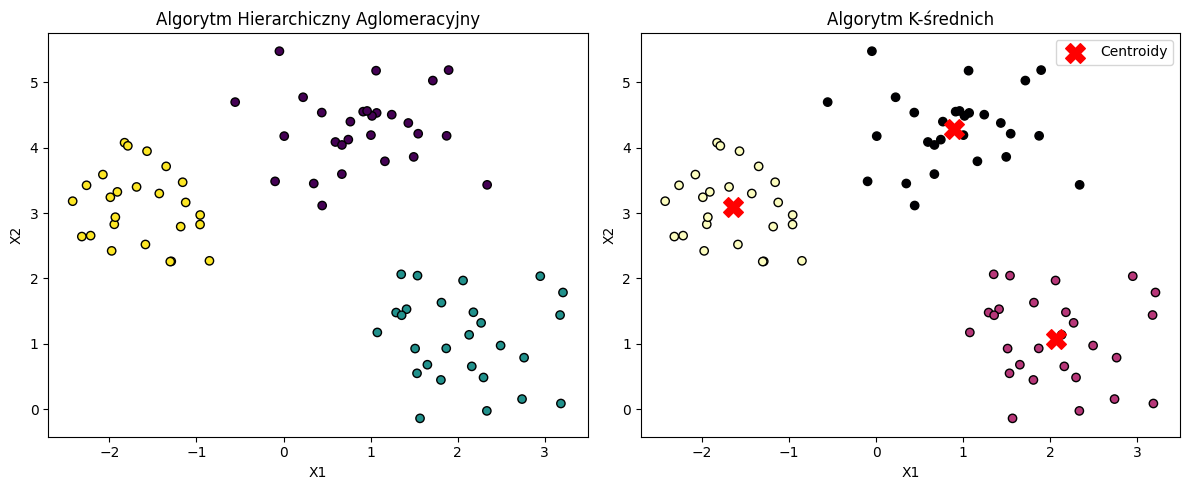

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

# A. Wczytaj dane z pliku k_means_data.csv
df = pd.read_csv('k_means_data.csv')
X = df.values  # Konwersja na tablicę numpy do obliczeń

# B. Zastosuj algorytm hierarchiczny aglomeracyjny
# Przyjmujemy n_clusters=3 na podstawie wizualnej oceny zbioru danych
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)

# C. Zastosuj algorytm k-średnich
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Opcjonalna wizualizacja wyników
plt.figure(figsize=(12, 5))

# Wykres dla algorytmu hierarchicznego
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=agglo_labels, cmap='viridis', edgecolor='k')
plt.title('Algorytm Hierarchiczny Aglomeracyjny')
plt.xlabel('X1')
plt.ylabel('X2')

# Wykres dla algorytmu k-średnich
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='magma', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroidy')
plt.title('Algorytm K-średnich')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.show()

## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

In [8]:
import numpy as np

def manual_kmeans(data, k, max_iters=100, tol=1e-4):
    # 1. Inicjalizacja centroidów (losowo z danych)
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in range(max_iters):
        # 2. Przypisanie do klastrów
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # 3. Aktualizacja centroidów
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])

        # Sprawdzenie warunku stopu
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids

    return labels, centroids

## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [ ]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()

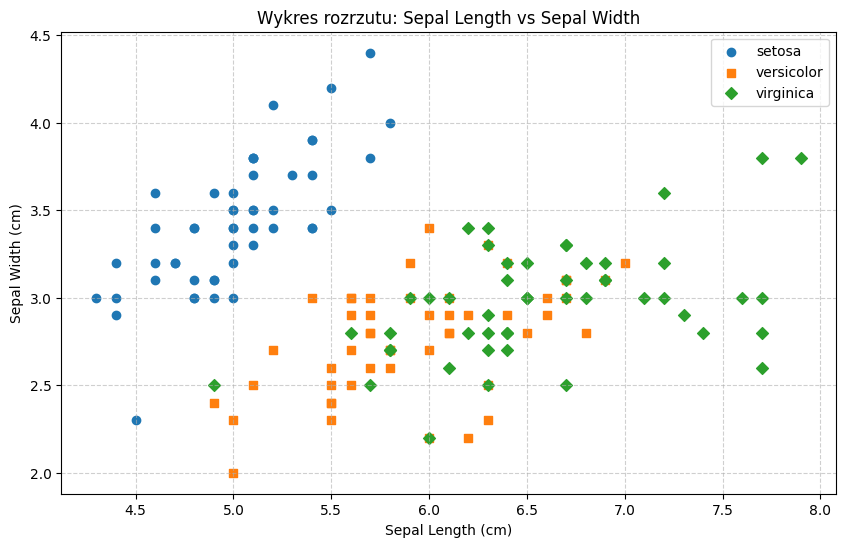

Statystyki atrybutów:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min           4.300000          2.000000           1.000000          0.100000
max           7.900000          4.400000           6.900000          2.500000
std           0.828066          0.435866           1.765298          0.762238

Macierz korelacji:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


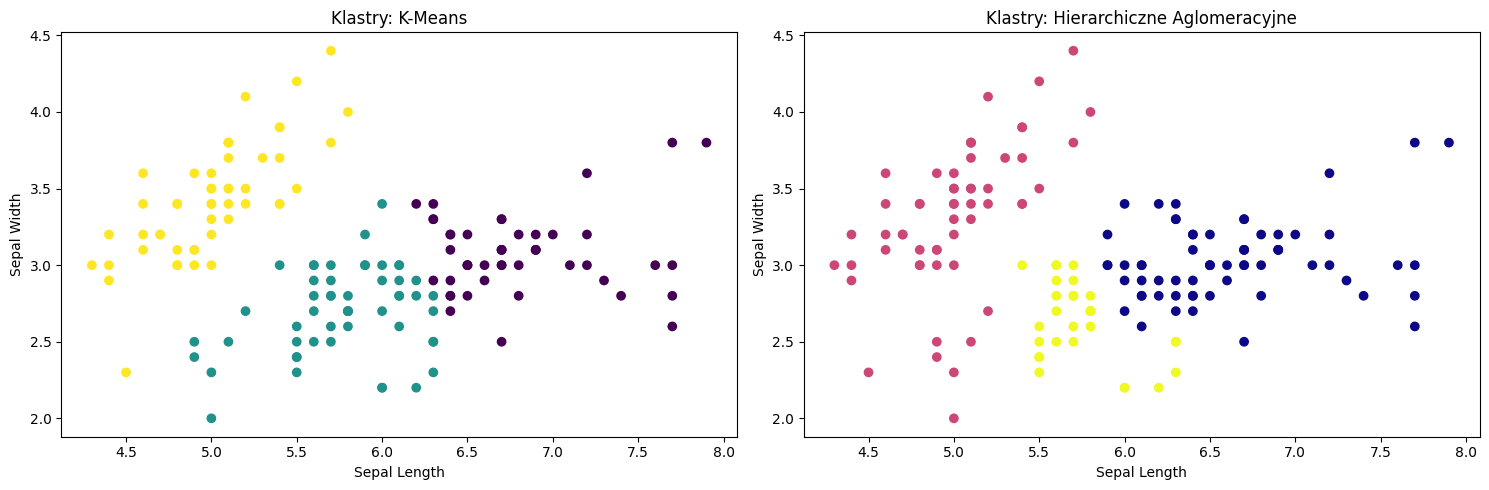

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering

# 1. Załaduj zbiór danych iris
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Dodajemy informację o gatunku do statystyk i wykresów
df_iris['species'] = iris.target

# 2. Wykres rozrzutu dla sepal_length i sepal_width
plt.figure(figsize=(10, 6))
markers = ['o', 's', 'D']
for i, marker in enumerate(markers):
    subset = df_iris[df_iris['species'] == i]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                label=iris.target_names[i], marker=marker)

plt.title('Wykres rozrzutu: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. Wartości min, max oraz średnie odchylenie kwadratowe (wariancja/std)
# Obliczamy dla atrybutów (bez kolumny species)
stats = df_iris.iloc[:, :4].agg(['min', 'max', 'std'])
print("Statystyki atrybutów:")
print(stats)

# 4. Współczynniki korelacji między atrybutami
correlation = df_iris.iloc[:, :4].corr()
print("\nMacierz korelacji:")
print(correlation)

# Wyodrębnienie danych do klastryzacji (tylko sepal length i sepal width)
X_iris = df_iris[['sepal length (cm)', 'sepal width (cm)']].values

# 5. Algorytm k-średnich (k=3, bo mamy 3 gatunki)
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
df_iris['kmeans_cluster'] = kmeans_iris.fit_predict(X_iris)

# 6. Algorytm hierarchiczny aglomeracyjny (k=3)
agglo_iris = AgglomerativeClustering(n_clusters=3)
df_iris['agglo_cluster'] = agglo_iris.fit_predict(X_iris)

# Wizualizacja wyników klastryzacji
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Wykres K-Means
ax1.scatter(X_iris[:, 0], X_iris[:, 1], c=df_iris['kmeans_cluster'], cmap='viridis')
ax1.set_title('Klastry: K-Means')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

# Wykres Hierarchiczny
ax2.scatter(X_iris[:, 0], X_iris[:, 1], c=df_iris['agglo_cluster'], cmap='plasma')
ax2.set_title('Klastry: Hierarchiczne Aglomeracyjne')
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')

plt.tight_layout()
plt.show()

## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

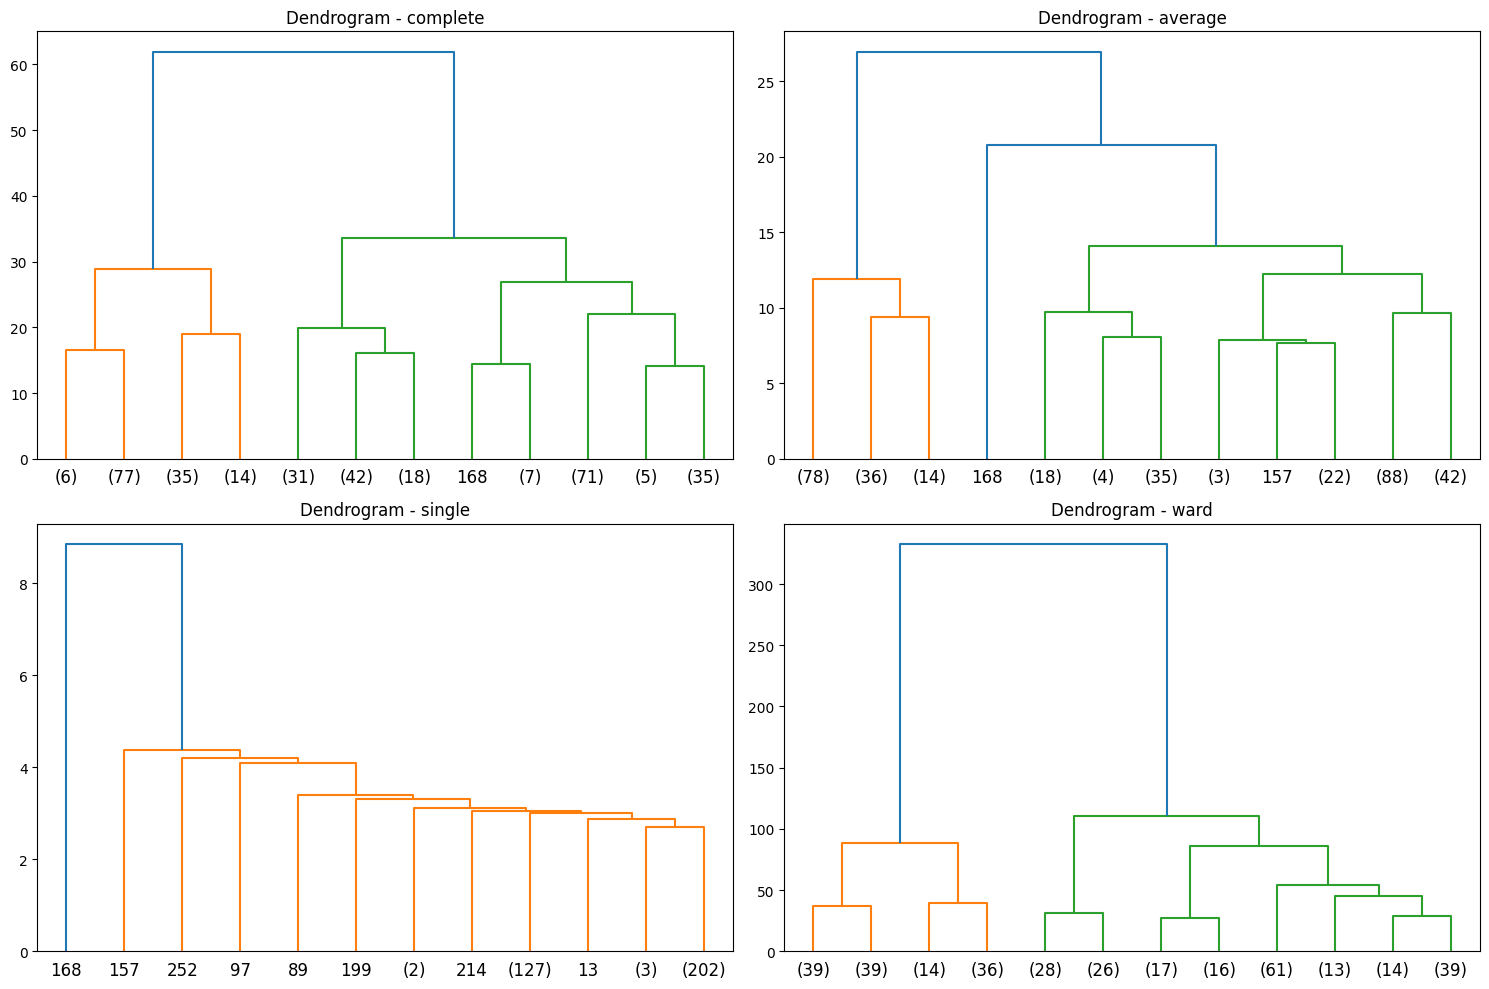

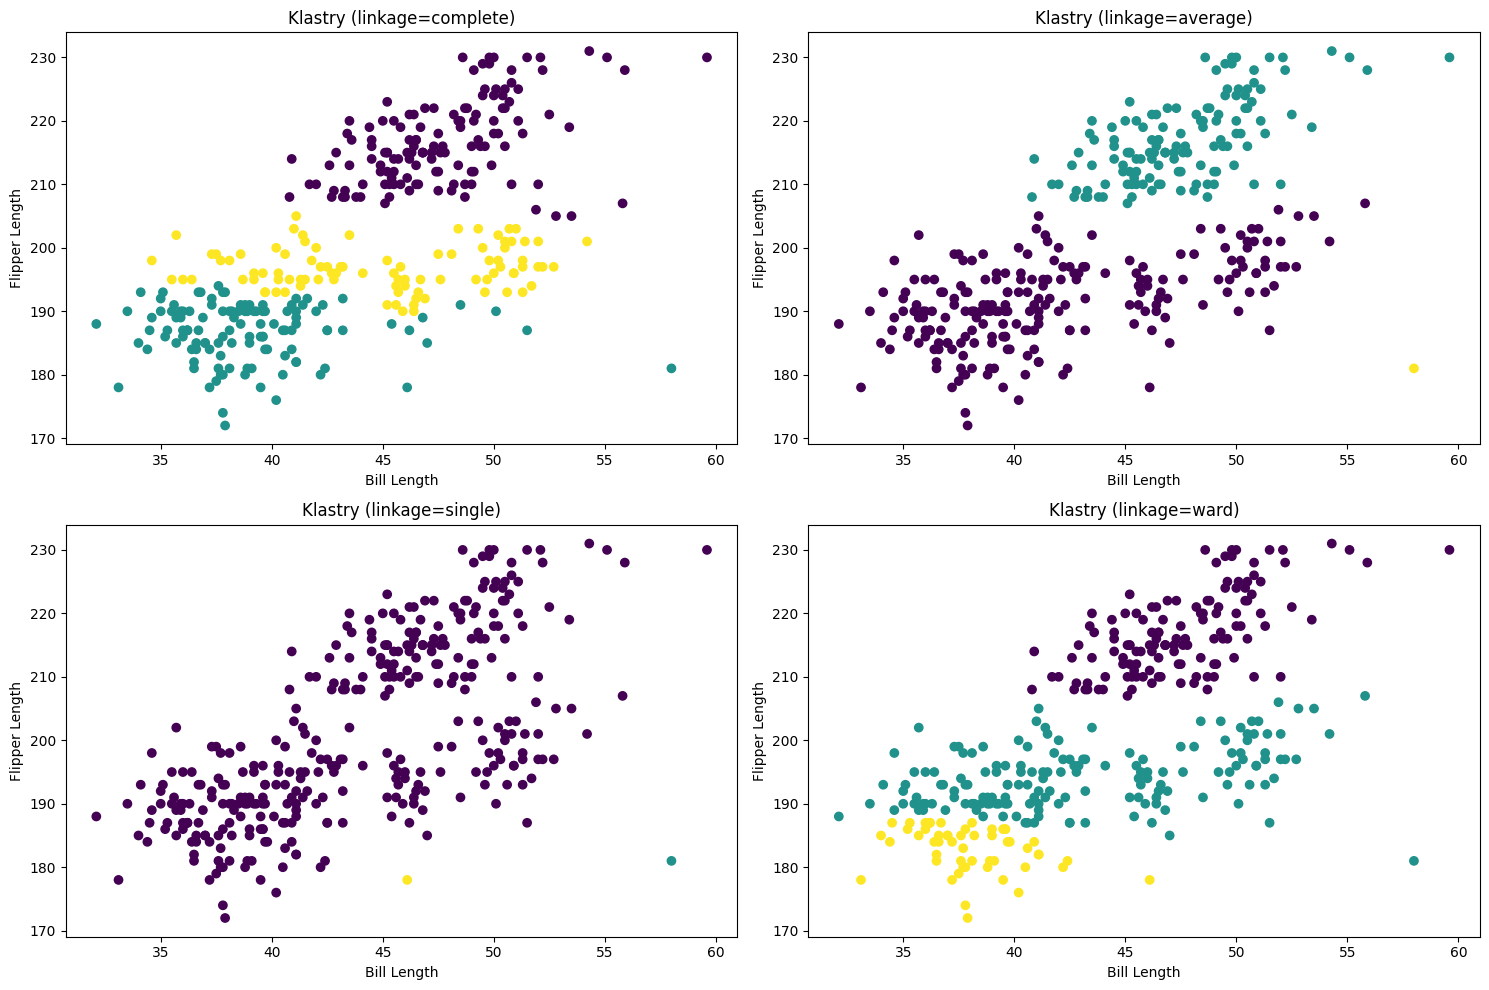

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 1. Wczytanie i czyszczenie danych
df = pd.read_csv("penguins.csv")
df = df.dropna(subset=['bill_length_mm', 'flipper_length_mm'])

# 2. Wybór atrybutów
X = df[['bill_length_mm', 'flipper_length_mm']]

# 3-5. Testowanie różnych sposobów obliczania odległości (linkage)
methods = ['complete', 'average', 'single', 'ward']

# Rysowanie Dendrogramów
plt.figure(figsize=(15, 10))
for i, m in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(X, method=m)
    dendrogram(Z, truncate_mode='lastp', p=12)
    plt.title(f"Dendrogram - {m}")

plt.tight_layout()
plt.show()

# Klastryzacja i Wykresy rozrzutu
plt.figure(figsize=(15, 10))
for i, m in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    agglo = AgglomerativeClustering(n_clusters=3, linkage=m)
    labels = agglo.fit_predict(X)
    plt.scatter(X['bill_length_mm'], X['flipper_length_mm'], c=labels, cmap='viridis')
    plt.title(f"Klastry (linkage={m})")
    plt.xlabel('Bill Length')
    plt.ylabel('Flipper Length')

plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

In [ ]:
df

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,Tak
B,172,70,12,4.3,5,1,4,12,Nie


In [ ]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak
